# Supervised Learning

In [ ]:
import sklearn
from sklearn import datasets
import numpy as np

In [ ]:
data = datasets.load_iris()

In [ ]:
import sklearn
from sklearn import datasets
import numpy as np

In [ ]:
data.data.shape

(150, 4)

In [ ]:
data.target.shape

(150,)

In [ ]:
np.unique(data.target)

array([0, 1, 2])

In [ ]:
x = data.data
y = data.target

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


In [ ]:
from sklearn import tree
 
# membuat model dengan decision tree classifier
clf = tree.DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,x,y,cv=5)

Scores show accuracy of each fold. It shows that model was stable.

In [ ]:
scores

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

## Decision Tree

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
 
# Membaca file iris.csv
iris = load_iris()

In [ ]:
pd.DataFrame(list(iris))

,0
0,data
1,target
2,frame
3,target_names
4,DESCR
5,feature_names
6,filename
7,data_module


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
df = pd.DataFrame(iris.data)

In [ ]:
df.columns = iris.feature_names
df['label'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df['Species'] = df['label'].replace({0:'setosa',1:'versicolor',2:'virginica'})

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
 5   Species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
from sklearn.model_selection import train_test_split
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model= DecisionTreeClassifier()
tree_model = tree_model.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = tree_model.predict(X_test)
acc_score = round(accuracy_score(y_pred,y_test),3)
print('Accuracy score:',acc_score)

Accuracy score: 1.0


In [ ]:
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])

2


### Visualize decision tree

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['sepal_length','sepal_width','petal_length','petal_widtj'],
    class_names = ['setosa','versicolor','virginica'],
    rounded=True,
    filled=True
)

In [ ]:
import pydot

(graph,) = pydot.graph_from_dot_file('iris_tree.dot')
graph.write_png('iris_tree.png')

## Linear Regression

In [ ]:
import numpy as np
#buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])
 
#data harga rumah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

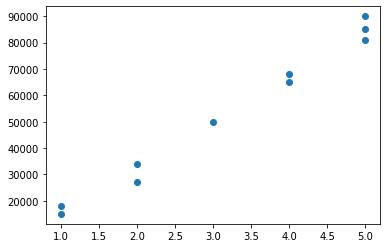

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(bedrooms,house_price)

In [ ]:
bedrooms.reshape(-1,1)

array([[1],
       [1],
       [2],
       [2],
       [3],
       [4],
       [4],
       [5],
       [5],
       [5]])

In [ ]:
from sklearn.linear_model import LinearRegression
bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

LinearRegression()

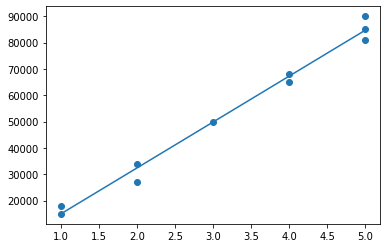

In [ ]:
plt.scatter(bedrooms,house_price)
plt.plot(bedrooms,linreg.predict(bedrooms))

## Logistic Regression

Dataset link : https://www.kaggle.com/datasets/dragonheir/logistic-regression

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Id column can be removed from training data

In [ ]:
data = df.drop(columns=['User ID'])

In [ ]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
# change categorical data into one hot encoded label
data = pd.get_dummies(data)

In [ ]:
data.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
predictions = ['Age','EstimatedSalary','Gender_Female','Gender_Male']
x = data[predictions]
y = data['Purchased']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [ ]:
scaled_data = scaler.transform(x)
scaled_data = pd.DataFrame(scaled_data,columns=x.columns)
scaled_data.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_data,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#uji akurasi
model.score(x_test,y_test)

0.825

# Unsupervised

## K-Means Clustering
Dataset link :https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df = df.rename(columns={
    'Gender':'gender',
    'Age':'age',
    'Annual Income (k$)':'annual_income',
    'Spending Score (1-100)':'spending_score'
})
df['gender'].replace(['Female','Male'],[0,1],inplace=True)
df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
from sklearn.cluster import KMeans

X = df.drop(['CustomerID','gender'],axis=1)
X.head()

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

In [ ]:
clusters

[308812.78,
 212840.1698209719,
 143342.751571706,
 104366.15145556197,
 75479.76429338777,
 58300.44332159069,
 51118.949931647294,
 44344.94980177718,
 40588.921495411836,
 37211.73554223554]

Text(0, 0.5, 'Inertia')

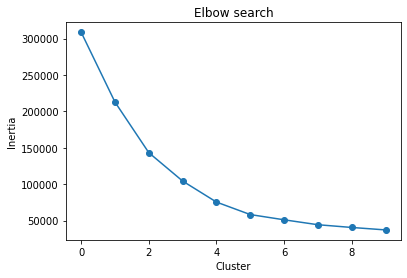

In [ ]:
plt.plot(clusters,marker='o')
plt.title('Elbow search')
plt.xlabel('Cluster')
plt.ylabel('Inertia')

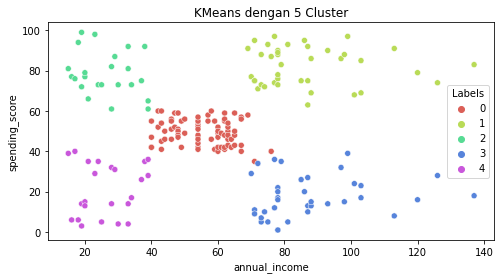

In [ ]:
import seaborn as sns
#membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)
#menambah label
X['Labels'] = km5.labels_

#membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'],y=X['spending_score'],hue=X['Labels'],palette=sns.color_palette('hls',5))
plt.title('KMeans dengan 5 Cluster')
plt.show()

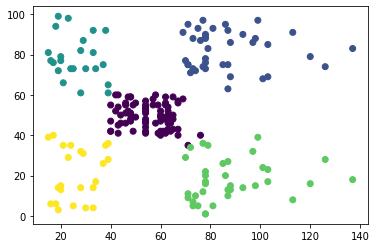

In [ ]:
plt.scatter(x=X['annual_income'],y=X['spending_score'],c=X['Labels'])

## Dimension Reduction (PCA)

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
x = iris.data
y = iris.target

#split data into train set and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()
model1 = decision_tree.fit(x_train,y_train)
model1.score(x_test,y_test)

0.9666666666666667

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

#mengaplikasikan PCA pada dataset
pca_data = pca.fit_transform(x_train)

#melihat variance dari setiap atribut
pca.explained_variance_ratio_

array([0.92848323, 0.04764372, 0.01931005, 0.004563  ])

In [ ]:
# PCA dengan 2 principal component
pca = PCA(n_components = 2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

In [ ]:
model2 = decision_tree.fit(x_train_pca,y_train)
model2.score(x_test_pca,y_test)

0.9333333333333333

In [ ]:
x_train_pca.shape,x_train.shape

((120, 2), (120, 4))

# Supervised (SVM)

Dataset link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## Classification

In [ ]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
x = df[df.columns[:8]]
y = df['Outcome']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train,y_train)

SVC()

In [ ]:
clf.score(x_test,y_test)

0.8051948051948052

## Regression (SVR)

link : https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression

In [ ]:
import pandas as pd
 
# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('Salary_Data.csv')

In [ ]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
x = data['YearsExperience']
y = data['Salary']

In [ ]:
# mengubah bentuk atribut
X = x[:,np.newaxis]
X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [ ]:
from sklearn.svm import SVR
# membangun model dengan parameter C, gamma, dan kernel
svr = SVR(kernel='rbf',gamma=0.05,C=1000)
svr.fit(X,y)

SVR(C=1000, gamma=0.05)

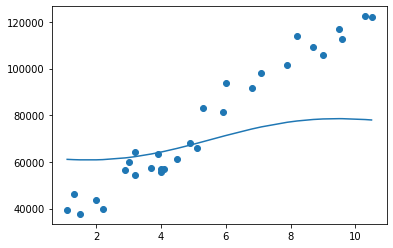

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.plot(X,svr.predict(X))

In [ ]:
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

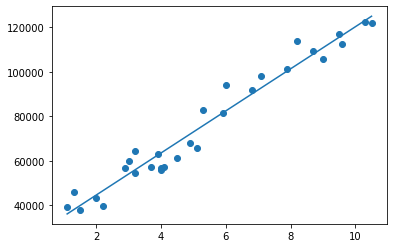

In [ ]:
plt.scatter(X,y)
plt.plot(X,linreg.predict(X))

## Grid search

In [ ]:
import pandas as pd
 
# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('Salary_Data.csv')

In [ ]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
import numpy as np
x = data['YearsExperience']
y = data['Salary']
X = x[:,np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [ ]:
model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C': [1000,10000,100000],
    'gamma': [0.5,0.05,0.005]
}
grid_search = GridSearchCV(model,parameters)
grid_search.fit(X,y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']})

In [ ]:
grid_search.best_params_

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}

In [ ]:
model_baru = SVR(kernel='rbf',C=100000,gamma=0.005)
model_baru.fit(X,y)

SVR(C=100000, gamma=0.005)

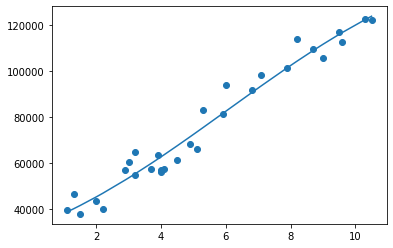

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.plot(X,model_baru.predict(X))

# Deep Learning


## CNN

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.8.2


In [ ]:
tf.keras.utils.set_random_seed(
    0
)

In [ ]:
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2022-06-29 06:26:27--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 205.185.216.42, 205.185.216.10
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|205.185.216.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   200MB/s    in 0.3s    

2022-06-29 06:26:28 (200 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [ ]:
os.listdir('/tmp/images/val')

['messy', 'clean']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=4,
    class_mode='binary',
    seed=0
)

test_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=4,
    class_mode='binary',
    seed=0
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
model = tf.keras.models.Sequential([
                              Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
                              MaxPooling2D(2,2),
                              Conv2D(64,(3,3),activation='relu'),
                              MaxPooling2D(2,2),
                              Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)),
                              MaxPooling2D(2,2),
                              Conv2D(512,(3,3),activation='relu',input_shape=(150,150,3)),
                              MaxPooling2D(2,2),
                              Flatten(),
                              Dense(512,activation='relu'),
                              Dense(1,activation='sigmoid')

])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['acc'])

In [ ]:
model.fit(train_generator,
          steps_per_epoch=25,
          epochs=20,
          validation_data=test_generator,
          validation_steps=5,
          verbose=2)

Epoch 1/20
25/25 - 12s - loss: 0.7691 - acc: 0.4800 - val_loss: 0.6911 - val_acc: 0.5000 - 12s/epoch - 478ms/step
Epoch 2/20
25/25 - 11s - loss: 0.6898 - acc: 0.5600 - val_loss: 0.6857 - val_acc: 0.5000 - 11s/epoch - 436ms/step
Epoch 3/20
25/25 - 11s - loss: 0.7007 - acc: 0.4300 - val_loss: 0.6926 - val_acc: 0.5000 - 11s/epoch - 434ms/step
Epoch 4/20
25/25 - 11s - loss: 0.6888 - acc: 0.6000 - val_loss: 0.6661 - val_acc: 0.5000 - 11s/epoch - 432ms/step
Epoch 5/20
25/25 - 11s - loss: 0.6930 - acc: 0.5300 - val_loss: 0.6437 - val_acc: 0.5500 - 11s/epoch - 430ms/step
Epoch 6/20
25/25 - 11s - loss: 0.6686 - acc: 0.7200 - val_loss: 0.5703 - val_acc: 0.7500 - 11s/epoch - 431ms/step
Epoch 7/20
25/25 - 11s - loss: 0.6899 - acc: 0.6200 - val_loss: 0.5979 - val_acc: 0.8000 - 11s/epoch - 429ms/step
Epoch 8/20
25/25 - 11s - loss: 0.6489 - acc: 0.6300 - val_loss: 0.5786 - val_acc: 0.7500 - 11s/epoch - 430ms/step
Epoch 9/20
25/25 - 11s - loss: 0.6412 - acc: 0.5900 - val_loss: 0.6682 - val_acc: 0.5000

In [ ]:
!gdown 138NXwtDAT_yuTUjPrYtCfzOn7TNox7jE
!gdown 1B3t4satf5Ra-vkt4Z-X9BKoQ8JGjr-2e

Downloading...
From: https://drive.google.com/uc?id=138NXwtDAT_yuTUjPrYtCfzOn7TNox7jE
To: /content/e83dcfda80cf389a9f8e181519b0f7bf.jpg
100% 98.4k/98.4k [00:00<00:00, 50.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1B3t4satf5Ra-vkt4Z-X9BKoQ8JGjr-2e
To: /content/download.jpg
100% 9.96k/9.96k [00:00<00:00, 10.7MB/s]


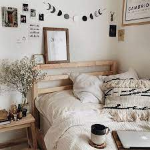

/content/download.jpg
clean


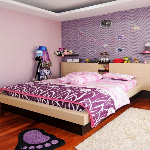

/content/e83dcfda80cf389a9f8e181519b0f7bf.jpg
clean


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
import cv2

pathfiles = ['/content/download.jpg',
        '/content/e83dcfda80cf389a9f8e181519b0f7bf.jpg']
for fn in pathfiles:
  path = fn
  img = cv2.resize(cv2.imread(path),(150,150))
  cv2_imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images,batch_size=10)
  print(fn)
  if classes==0:
    print('messy')
  else:
    print('clean')